In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [11]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6080602091976457090
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3591372800
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9189396126232916213
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [28]:
tf.test.is_built_with_cuda()

True

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [30]:
x_train.shape

(50000, 32, 32, 3)

the 3 in the last is for RGB values of an image

In [31]:
def plot_sample(index):
    plt.figure(figsize=(3,1))
    plt.imshow(x_train[index])

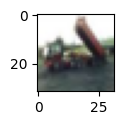

In [32]:
plot_sample(2)

In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Here the clasees is a text array of the y index 

In [34]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [35]:
classes[y_train[2][0]]

'truck'

In [36]:
X_train_scaled = x_train / 255 # Scalling the training samples
X_test_scaled = x_test / 255

In [37]:
# Now we will do one hot encoding for y train samples
# for we have an api in keras tensorflow
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10
)

In [38]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10)

In [40]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [41]:
model = keras.Sequential([
    # Input Layer
    keras.layers.Flatten(input_shape=(32,32,3)),

    # Hidden Layers
    keras.layers.Dense(800,activation='relu'), # In hidden layers activation relu is preffered
    keras.layers.Dense(400,activation='relu'), # In hidden layers activation relu is preffered


    # Output layer
    keras.layers.Dense(10,activation='sigmoid'), # if you dont give any activation function its linear by default so it wont do any activation

])

In [42]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy', # here we used categorical_crossentropy because when we use one hot encoding we use this but in out previous hand written digits classification we used sparse_categorical_crossentropy
    metrics=['accuracy']
)

In [43]:
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8476 - accuracy: 0.3367
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6603 - accuracy: 0.4139
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5834 - accuracy: 0.4415
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5255 - accuracy: 0.4629
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4776 - accuracy: 0.4779
Epoch 6/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4389 - accuracy: 0.4947
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4018 - accuracy: 0.5063
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3706 - accuracy: 0.5183
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3395 - accuracy: 0.5270
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

In [ ]:
y_test[:10]

In [ ]:
X_test_scaled[0].shape

In [ ]:
pred = model.predict(X_test_scaled)

In [ ]:
"Pred " + classes[np.argmax(pred[2])], "Truth "+ classes[y_test[2][0]]

In [ ]:
for i in range(50):
    if np.argmax(pred[i]) != y_test[i]:
        print(f"Predicted - [{np.argmax(pred[i])} {classes[np.argmax(pred[2])]}], Truth - {y_test[i]} { classes[y_test[i][0]]}, Index - {i}")

In [ ]:
x_test.shape

In [ ]:
def get_model():
    model = keras.Sequential([
        # Input Layer
        keras.layers.Flatten(input_shape=(32,32,3)),
        # Hidden Layers
        keras.layers.Dense(800,activation='relu'), 
        keras.layers.Dense(400,activation='relu'), 
        # Output layer
        keras.layers.Dense(10,activation='sigmoid'), 

    ])

    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

# Do this Excersize after you hav